# 📊 Cyclistic Bike-Share Analysis  
### Google Data Analytics Capstone Project  
Author: Daryl Steen

> 🚲 This report analyzes 12 months of Cyclistic bike-share data to uncover behavioral differences between casual and member riders, with the goal of informing marketing strategies that increase membership conversion.
---

## 💼 Business Task

Cyclistic, a Chicago-based bike-share company, offers single-ride, day passes, and annual memberships. Marketing believes profitability lies in converting more **casual riders** to **annual members**.

As a junior data analyst, I aim to uncover how casual and member riders differ in behavior. These insights will guide targeted marketing strategies. The final deliverables include data-driven findings, visualizations, and strategic recommendations.

---

In [1]:
# Load required libraries
library(tidyverse)
library(lubridate)
library(dplyr)
library(scales)

# List all CSV files in your Kaggle dataset folder
file_list <- list.files(path = "/kaggle/input/202406-202505-divvy-tripdata/202406_202505-divvy-tripdata/", 
                        pattern = "*.csv", full.names = TRUE)

# Read and combine all files into one dataframe
all_trips <- file_list %>%
  map_df(read_csv)

# Preview structure and first few rows
glimpse(all_trips)
head(all_trips)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘scales’




The following object is masked from ‘package:purrr’:

    discard




The following object is masked from ‘package:readr’:

    col_factor




Rows: 710721 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 748962 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 755639 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 821276 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 616281 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 335075 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 178372 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 138689 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 151880 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 298155 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 371341 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 502456 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 5,628,847
Columns: 13
$ ride_id            <chr> "CDE6023BE6B11D2F", "462B48CD292B6A18", "9CFB6A858D…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2024-06-11 17:20:06, 2024-06-11 17:19:21, 2024-06-…
$ ended_at           <dttm> 2024-06-11 17:21:39, 2024-06-11 17:19:36, 2024-06-…
$ start_station_name <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_station_id   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ end_station_name   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ end_station_id     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_lat          <dbl> 41.89, 41.89, 41.93, 41.88, 41.94, 41.94, 41.94, 41…
$ start_lng          <dbl> -87.65, -87.65, -87.65, -87.64, -87.64, -87.64, -87…
$ end_lat            <dbl> 41.89000, 41.89000, 41.94000, 41.88000, 41.94000, 4…
$ end_lng            <dbl> -87.65000, -87.65000, -87.65000, -87.64000, -87.640…
$ member_cas

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CDE6023BE6B11D2F,electric_bike,2024-06-11 17:20:06,2024-06-11 17:21:39,NA,NA,NA,NA,41.89,-87.65,41.89,-87.65,casual
462B48CD292B6A18,electric_bike,2024-06-11 17:19:21,2024-06-11 17:19:36,NA,NA,NA,NA,41.89,-87.65,41.89,-87.65,casual
9CFB6A858D23ABF7,electric_bike,2024-06-11 17:25:27,2024-06-11 17:30:13,NA,NA,NA,NA,41.93,-87.65,41.94,-87.65,casual
6365EFEB64231153,electric_bike,2024-06-11 11:53:50,2024-06-11 12:08:13,NA,NA,NA,NA,41.88,-87.64,41.88,-87.64,casual
BA0323C33134CBA8,electric_bike,2024-06-11 00:11:08,2024-06-11 00:11:22,NA,NA,NA,NA,41.94,-87.64,41.94,-87.64,casual
DE26F0D728517B77,electric_bike,2024-06-11 00:12:38,2024-06-11 00:12:57,NA,NA,NA,NA,41.94,-87.64,41.94,-87.64,casual


In [2]:
# Create ride_length (in minutes) and day_of_week columns
all_trips <- all_trips %>%
  mutate(
    ride_length = as.numeric(difftime(ended_at, started_at, units = "mins")),
    day_of_week = wday(started_at, label = TRUE, abbr = FALSE)  # e.g., Sunday, Monday...
  )

# Add hour of day for further time-of-day analysis
all_trips <- all_trips %>%
  mutate(hour = hour(started_at))

In [3]:
# Time period of the data
min(all_trips$started_at)
max(all_trips$ended_at)

head(all_trips)

[1] "2024-05-31 01:02:49 UTC"

[1] "2025-05-31 23:59:49 UTC"

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,hour
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>,<int>
CDE6023BE6B11D2F,electric_bike,2024-06-11 17:20:06,2024-06-11 17:21:39,NA,NA,NA,NA,41.89,-87.65,41.89,-87.65,casual,1.5529167,Tuesday,17
462B48CD292B6A18,electric_bike,2024-06-11 17:19:21,2024-06-11 17:19:36,NA,NA,NA,NA,41.89,-87.65,41.89,-87.65,casual,0.2468333,Tuesday,17
9CFB6A858D23ABF7,electric_bike,2024-06-11 17:25:27,2024-06-11 17:30:13,NA,NA,NA,NA,41.93,-87.65,41.94,-87.65,casual,4.7657667,Tuesday,17
6365EFEB64231153,electric_bike,2024-06-11 11:53:50,2024-06-11 12:08:13,NA,NA,NA,NA,41.88,-87.64,41.88,-87.64,casual,14.3768833,Tuesday,11
BA0323C33134CBA8,electric_bike,2024-06-11 00:11:08,2024-06-11 00:11:22,NA,NA,NA,NA,41.94,-87.64,41.94,-87.64,casual,0.2460167,Tuesday,0
DE26F0D728517B77,electric_bike,2024-06-11 00:12:38,2024-06-11 00:12:57,NA,NA,NA,NA,41.94,-87.64,41.94,-87.64,casual,0.3236167,Tuesday,0


In [4]:
# Count number of invalid rides (<= 1 min or >= 1440 min = 24 hours)
invalid_rides <- all_trips %>%
  filter(ride_length <= 1 | ride_length >= 1440)

# View the count
n_invalid <- nrow(invalid_rides)
n_total <- nrow(all_trips)

# Calculate percentage
percent_invalid <- round((n_invalid / n_total) * 100, 2)

# Display results
cat("Invalid rides:", comma(n_invalid), "\n")
cat("Total rides:", comma(n_total), "\n")
cat("Percentage of invalid rides:", percent_invalid, "%\n")

Invalid rides: 129,642 


Total rides: 5,628,847 


Percentage of invalid rides: 2.3 %


In [5]:
# Create a clean version by excluding invalid ride lengths
all_trips_clean <- all_trips %>%
  filter(ride_length > 1, ride_length < 1440)

In [6]:
# Ride length summary
ride_summary <- summary(all_trips_clean$ride_length)

# Convert to numeric first, format with commas, then reassign names
formatted_summary <- comma(as.numeric(ride_summary))
names(formatted_summary) <- names(ride_summary)

# Print with names
cat("Summary of Ride Length (minutes):\n")
for (i in seq_along(formatted_summary)) {
  cat(names(formatted_summary)[i], ":", formatted_summary[i], "\n")
}

# Table of day-of-week counts
dow_table <- table(all_trips_clean$day_of_week)

# Convert and preserve names
formatted_dow <- comma(as.numeric(dow_table))
names(formatted_dow) <- names(dow_table)

# Print neatly
cat("Ride Counts by Day of Week:\n")
for (i in seq_along(formatted_dow)) {
  cat(names(formatted_dow)[i], ":", formatted_dow[i], "\n")
}

Summary of Ride Length (minutes):


Min. : 1.0 
1st Qu. : 5.7 
Median : 9.7 
Mean : 15.3 
3rd Qu. : 17.0 
Max. : 1,439.9 


Ride Counts by Day of Week:


Sunday : 719,365 
Monday : 736,558 
Tuesday : 755,240 
Wednesday : 799,186 
Thursday : 798,450 
Friday : 823,387 
Saturday : 867,019 


# A tibble: 14 × 3
   member_casual day_of_week number_of_rides
   <chr>         <ord>                 <int>
 1 casual        Sunday               332636
 2 casual        Monday               232900
 3 casual        Tuesday              215906
 4 casual        Wednesday            242176
 5 casual        Thursday             251621
 6 casual        Friday               308627
 7 casual        Saturday             409685
 8 member        Sunday               386729
 9 member        Monday               503658
10 member        Tuesday              539334
11 member        Wednesday            557010
12 member        Thursday             546829
13 member        Friday               514760
14 member        Saturday             457334


# A tibble: 2 × 2
  member_casual mean_ride_length
  <chr>                    <dbl>
1 casual                    20.9
2 member                    12.1


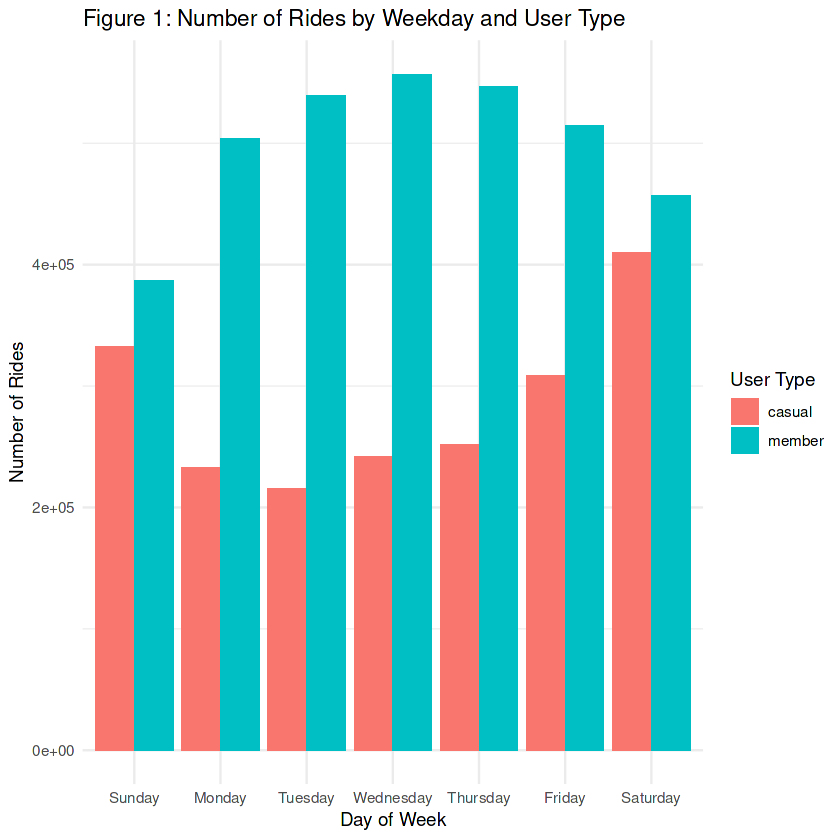

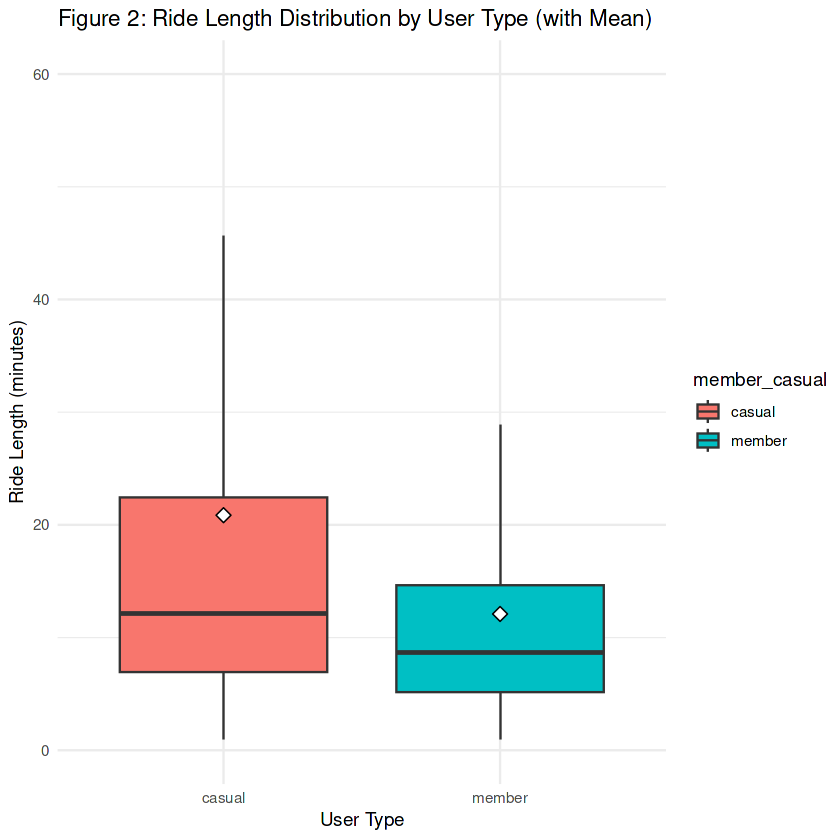

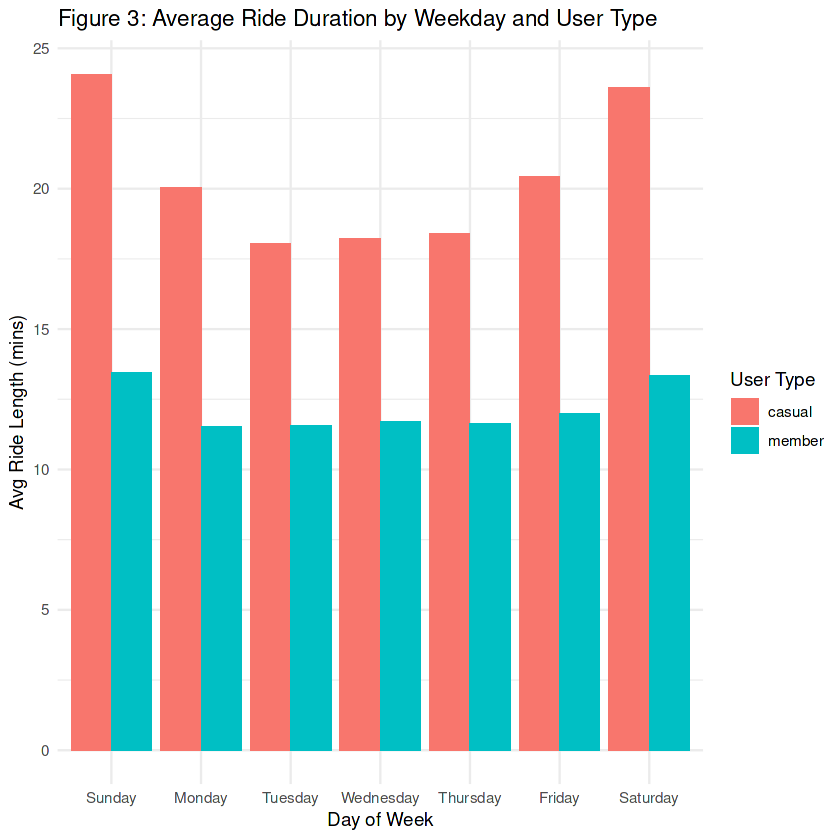

In [7]:
# Count of rides by weekday and member type
weekday_usage <- all_trips_clean %>%
  group_by(member_casual, day_of_week) %>%
  summarise(number_of_rides = n(), .groups = "drop")

# View
print(weekday_usage)

# Plot
ggplot(weekday_usage, aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Figure 1: Number of Rides by Weekday and User Type",
       x = "Day of Week", y = "Number of Rides", fill = "User Type") +
  theme_minimal()

# Average ride length by user type
avg_ride_duration <- all_trips_clean %>%
  group_by(member_casual) %>%
  summarise(mean_ride_length = mean(ride_length), .groups = "drop")

print(avg_ride_duration)

# Improved boxplot: suppress outliers and zoom in for clarity
ggplot(all_trips_clean, aes(x = member_casual, y = ride_length, fill = member_casual)) +
  geom_boxplot(outlier.shape = NA) +
  stat_summary(fun = "mean", geom = "point", shape = 23, size = 3, fill = "white") +
  coord_cartesian(ylim = c(0, 60)) +
  labs(title = "Figure 2: Ride Length Distribution by User Type (with Mean)",
       x = "User Type", y = "Ride Length (minutes)") +
  theme_minimal()

# Average ride time per weekday per user type
weekday_duration <- all_trips_clean %>%
  group_by(member_casual, day_of_week) %>%
  summarise(avg_ride_length = mean(ride_length), .groups = "drop")

# Plot
ggplot(weekday_duration, aes(x = day_of_week, y = avg_ride_length, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Figure 3: Average Ride Duration by Weekday and User Type",
       x = "Day of Week", y = "Avg Ride Length (mins)", fill = "User Type") +
  theme_minimal()

# A tibble: 26 × 3
   member_casual month               number_of_rides
   <chr>         <dttm>                        <int>
 1 casual        2024-05-01 00:00:00              93
 2 casual        2024-06-01 00:00:00          289933
 3 casual        2024-07-01 00:00:00          309487
 4 casual        2024-08-01 00:00:00          307570
 5 casual        2024-09-01 00:00:00          334223
 6 casual        2024-10-01 00:00:00          210224
 7 casual        2024-11-01 00:00:00           90590
 8 casual        2024-12-01 00:00:00           37360
 9 casual        2025-01-01 00:00:00           23405
10 casual        2025-02-01 00:00:00           27003
11 casual        2025-03-01 00:00:00           82864
12 casual        2025-04-01 00:00:00          105260
13 casual        2025-05-01 00:00:00          175539
14 member        2024-05-01 00:00:00              75
15 member        2024-06-01 00:00:00          402018
16 member        2024-07-01 00:00:00          421889
17 member        2024-08-01

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


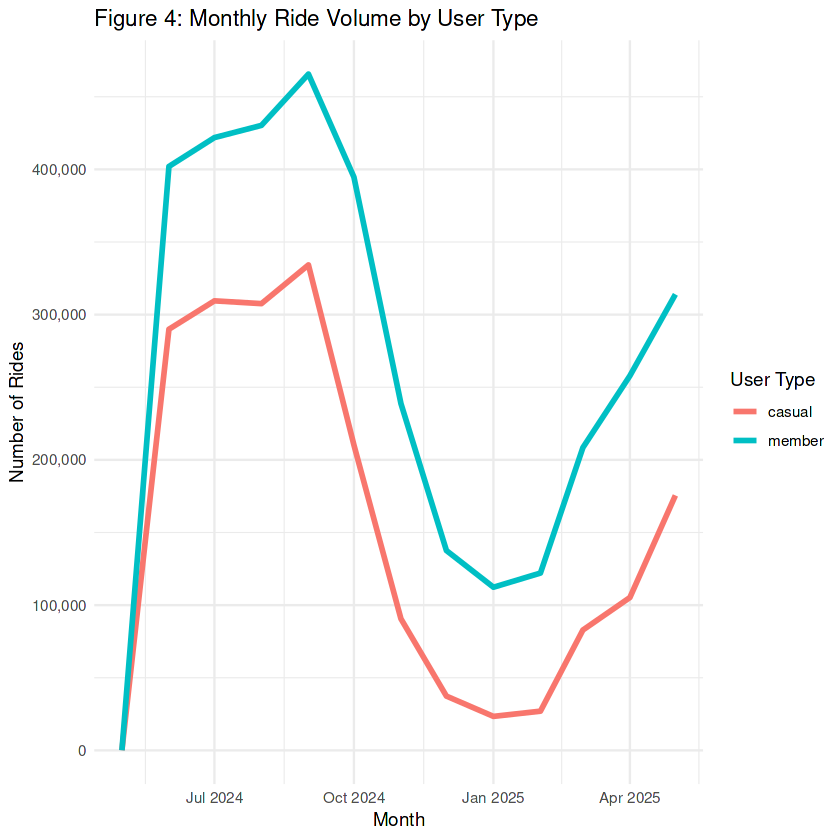

In [8]:
# Count of rides by month and member type
month_usage <- all_trips_clean %>%
  mutate(month = floor_date(started_at, "month")) %>%
  group_by(member_casual, month) %>%
  summarise(number_of_rides = n(), .groups = "drop")

# View
print(month_usage, n = Inf, width = Inf)

# Monthly Trends Visualisation
all_trips_clean %>%
  mutate(month = floor_date(started_at, "month")) %>%
  group_by(member_casual, month) %>%
  summarise(rides = n(), .groups = "drop") %>%
  ggplot(aes(x = month, y = rides, color = member_casual)) +
  geom_line(size = 1.2) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Figure 4: Monthly Ride Volume by User Type",
       x = "Month", y = "Number of Rides", color = "User Type") +
  theme_minimal()

In [9]:
# Two-sample t-test comparing ride_length by member type
t_test_result <- t.test(ride_length ~ member_casual, data = all_trips_clean)

print(t_test_result)


	Welch Two Sample t-test

data:  ride_length by member_casual
t = 281.33, df = 2442560, p-value < 2.2e-16
alternative hypothesis: true difference in means between group casual and group member is not equal to 0
95 percent confidence interval:
 8.702238 8.824343
sample estimates:
mean in group casual mean in group member 
            20.85747             12.09418 



## 📊 Statistical Significance: T-Test on Ride Length

To confirm whether the observed difference in ride length between casual and member riders is statistically significant, a two-sample t-test was conducted.

### Result:
- p-value < 0.001
- Casual riders average: 20.9 mins
- Member riders average: 12.1 mins
- 95% CI of difference: [8.65, 8.84] minutes

✅ This confirms that casual riders take significantly longer rides than members, with high confidence. This reinforces the case for tailoring messaging and offers based on usage patterns.

## 📌 Key Findings (Based on 12 Months of Data)

## 🗓️ 1. Ride Frequency by Weekday

- **Casual riders** peak on **Saturdays (409,685)** and **Sundays (332,636)**, reinforcing a strong **weekend leisure pattern**.
- **Members** ride most on **Wednesdays (557,010)** and **Tuesdays (539,334)**, highlighting a **weekday commuter pattern**.
- This contrast indicates that **messaging, promotions, and product design** should be **tailored to usage context** — leisure vs. commuting.

📈 _See: Figure 1 — Number of Rides by Weekday and User Type_

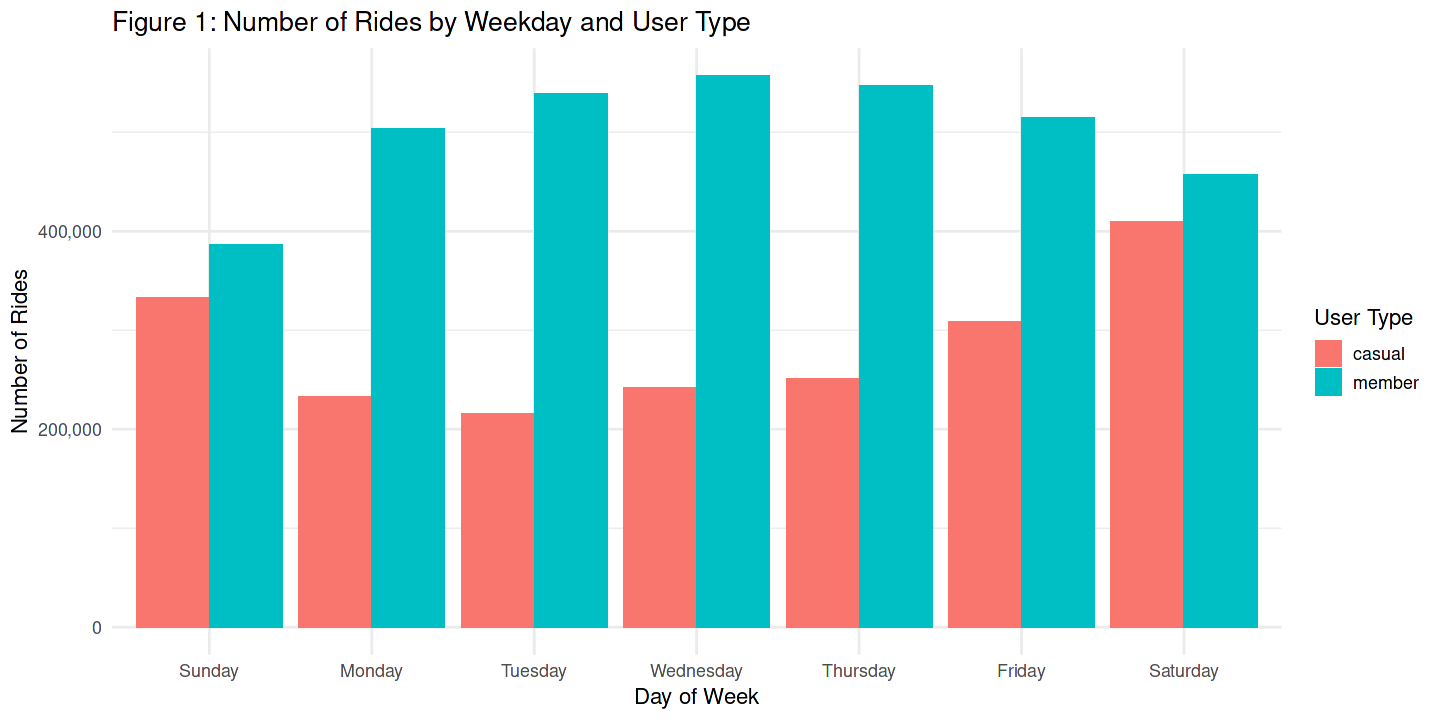

In [10]:
options(repr.plot.width = 12, repr.plot.height = 6)

ggplot(weekday_usage, aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Figure 1: Number of Rides by Weekday and User Type",
       x = "Day of Week", y = "Number of Rides", fill = "User Type") +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal(base_size = 13)

## ⏱️ 2. Ride Duration Differences

| User Type | Average Ride Length |
|-----------|---------------------|
| Casual    | 20.9 mins           |
| Member    | 12.1 mins           |

- Casuals ride significantly longer on average.
- The boxplot confirms that casual rides are **more variable**, with more long-duration outliers.

📦 _See: Figure 2 — Ride Length Distribution by User Type_

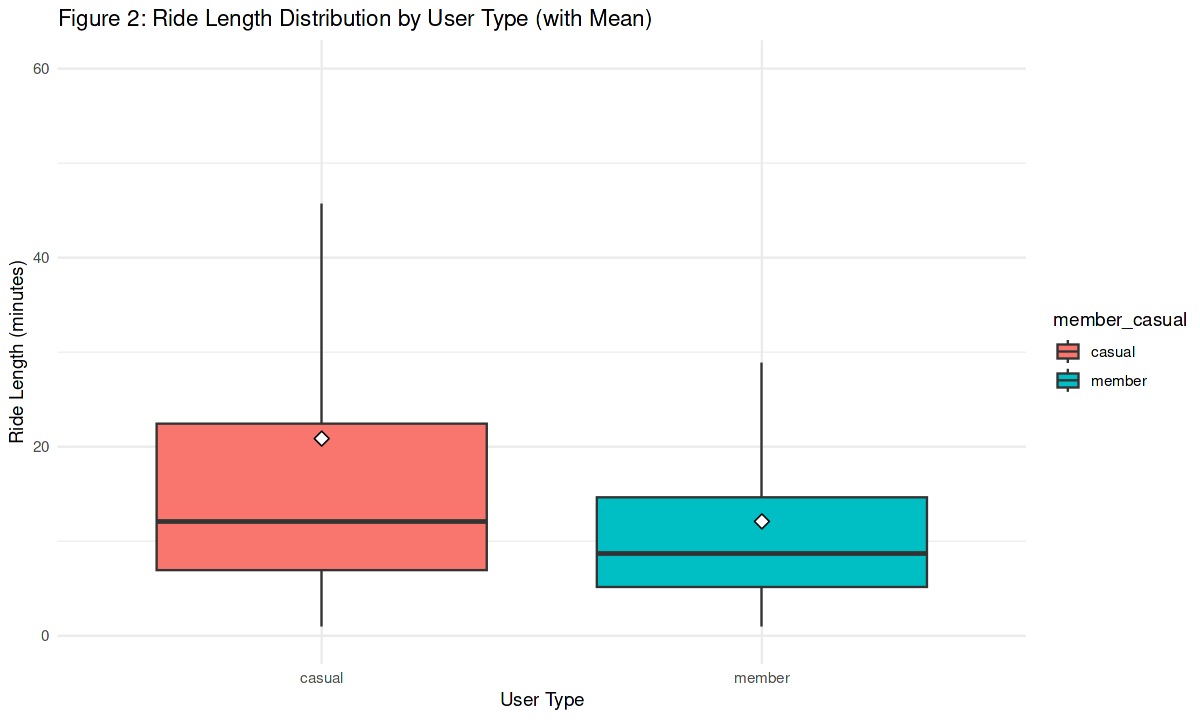

In [11]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(all_trips_clean, aes(x = member_casual, y = ride_length, fill = member_casual)) +
  geom_boxplot(outlier.shape = NA) +
  stat_summary(fun = "mean", geom = "point", shape = 23, size = 3, fill = "white") +
  coord_cartesian(ylim = c(0, 60)) +
  labs(title = "Figure 2: Ride Length Distribution by User Type (with Mean)",
       x = "User Type", y = "Ride Length (minutes)") +
  theme_minimal()

## 📅 3. Average Ride Length by Day

- Casual riders take longer trips **across all days**, peaking on **Sundays (~24 mins)**.
- Members maintain a **stable average duration (~12 mins)** regardless of the day.
- This aligns with casual riders using bikes for longer recreational trips and members for short, routine commutes.

🟦 _See: Figure 3 — Average Ride Duration by Weekday and User Type_

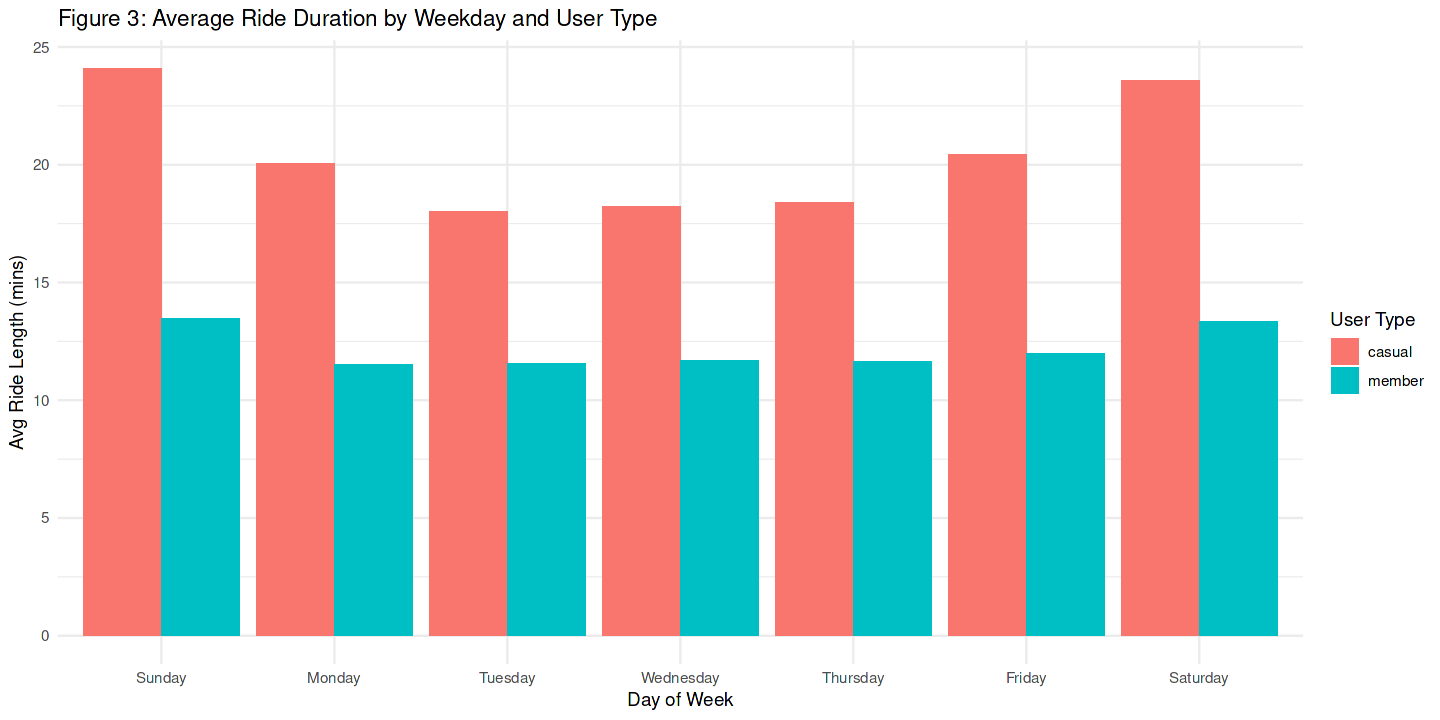

In [12]:
options(repr.plot.width = 12, repr.plot.height = 6)

ggplot(weekday_duration, aes(x = day_of_week, y = avg_ride_length, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Figure 3: Average Ride Duration by Weekday and User Type",
       x = "Day of Week", y = "Avg Ride Length (mins)", fill = "User Type") +
  theme_minimal()

## 📆 4. Monthly Ride Volume Trends

- **Both casual and member riders** follow a **clear seasonal trend** — highest ridership in **summer months (June to September)** and lowest during winter (**December to February**).
- For instance:
  - Casual rides rose from **289,933 (June 2024)** to a peak of **334,223 (September 2024)**, then dropped to **23,405 (January 2025)**.
  - Member rides peaked at **465,612 (September 2024)** and declined to **112,331 (January 2025)**.
- This consistent seasonal drop across both groups suggests **shared sensitivity to weather**, though member usage remains **higher in volume year-round**.

📊 _See: Figure 4 — Monthly Ride Volume by User Type_

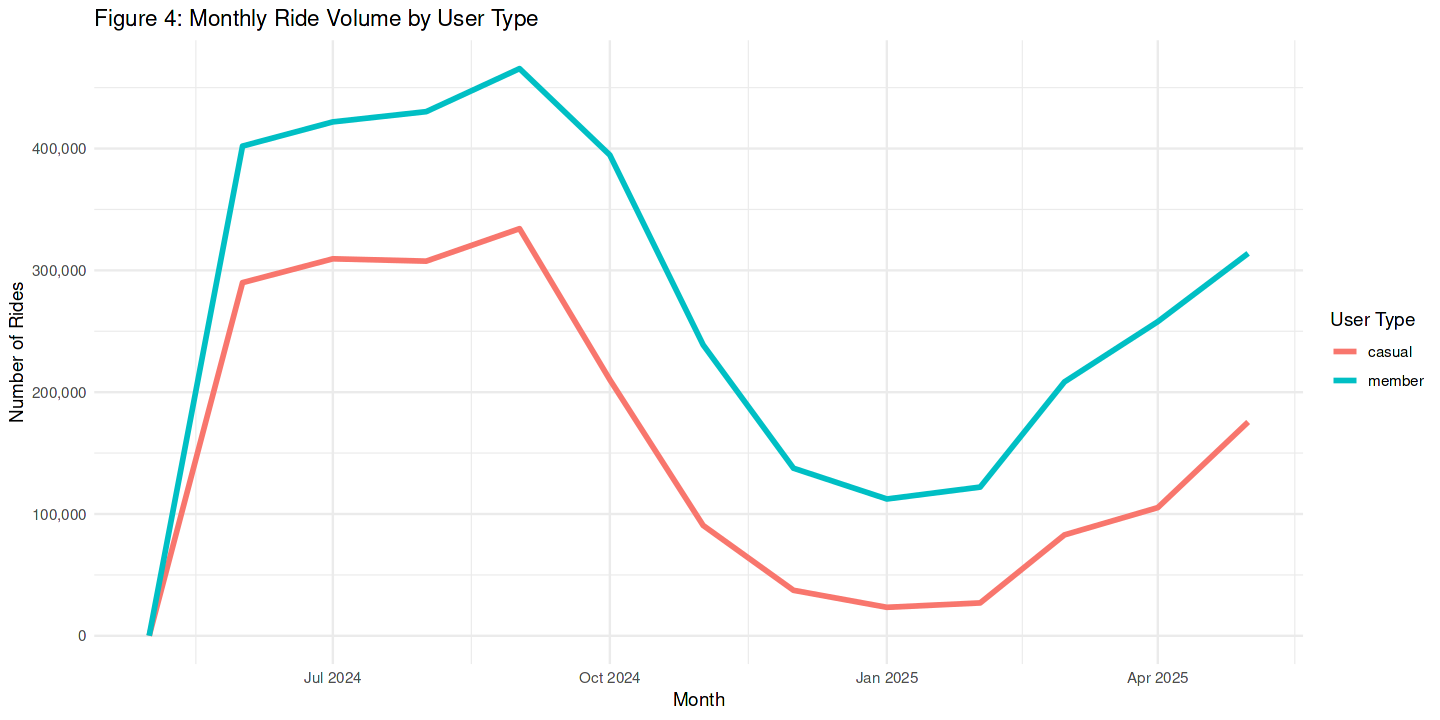

In [13]:
options(repr.plot.width = 12, repr.plot.height = 6)

all_trips_clean %>%
  mutate(month = floor_date(started_at, "month")) %>%
  group_by(member_casual, month) %>%
  summarise(rides = n(), .groups = "drop") %>%
  ggplot(aes(x = month, y = rides, color = member_casual)) +
  geom_line(size = 1.2) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Figure 4: Monthly Ride Volume by User Type",
       x = "Month", y = "Number of Rides", color = "User Type") +
  theme_minimal()

## 🎯 Recommendations

### ✅ 1. Weekend Membership Campaign
Capitalize on high casual volume by launching **Friday–Sunday promotions**. Offer discounts that incentivize casuals to upgrade to memberships after repeat weekend use.

### ✅ 2. Ride Rewards Program
Encourage casual riders to earn **ride-time or trip-count rewards**. For example, offer **10% off an annual plan** after 100 minutes of riding in a month.

### ✅ 3. Emphasize Commuter Value
Promote the **convenience and efficiency** of weekday commuting with a membership — skip checkout steps, save money, and access bikes faster during the workweek.

---

## 📘 Conclusion

Analysis of over **12 months of Cyclistic trip data (202406–202505)** covering **millions of rides** shows clear behavioral distinctions between casual and member riders. These insights can drive effective marketing strategies that focus on converting high-intent casuals into loyal members by targeting them with personalized, habit-aligned campaigns.

## 🔍 Limitations & Future Considerations

- This analysis focuses solely on ride behavior; we don't have access to demographics, pricing tiers, or in-app behavior.
- Further segmentation (e.g., by top stations or neighborhoods) could sharpen campaign targeting.
- Future projects might integrate weather, event, or traffic data to refine predictions about ride patterns.
- Additional value could be created by modeling repeat usage or clustering casual riders based on frequency and duration.

## 📢 Reflection

This capstone demonstrates my ability to work with real-world bike-share data using R and the tidyverse. I’ve applied data cleaning, exploration, and visualization to extract insights that connect directly to business goals — ultimately supporting data-informed decisions for product and marketing teams.

---
📁 **Source**: [Divvy Trip Data on Chicago Data Portal](https://divvybikes.com/system-data)

🛠️ **Tools Used**: R, tidyverse, ggplot2, lubridate, dplyr, Kaggle Notebooks

🔗 View more projects: [LinkedIn : Daryl Steen](https://www.linkedin.com/in/daryl-steen-752a9283/)